In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
f = open("res.json", "r")
res = f.read()

print(res)

{"schema":{"fields":[{"name":"Time","type":"string"},{"name":"Connection","type":"string"},{"name":"Percentage","type":"number"}],"primaryKey":["Time","Connection"],"pandas_version":"0.20.0"},"data":[{"Time":"2015-01","Connection":"DEU to POL","Percentage":4.2471042471},{"Time":"2015-02","Connection":"DEU to POL","Percentage":1.9361327634},{"Time":"2015-03","Connection":"DEU to POL","Percentage":2.5389365035},{"Time":"2015-04","Connection":"DEU to POL","Percentage":4.7326245636},{"Time":"2015-05","Connection":"DEU to POL","Percentage":4.296947271},{"Time":"2015-06","Connection":"DEU to POL","Percentage":2.8346869269},{"Time":"2015-07","Connection":"DEU to POL","Percentage":2.2830805509},{"Time":"2015-08","Connection":"DEU to POL","Percentage":3.7755488266},{"Time":"2015-09","Connection":"DEU to POL","Percentage":2.8851488811},{"Time":"2015-10","Connection":"DEU to POL","Percentage":2.4131439329},{"Time":"2015-11","Connection":"DEU to POL","Percentage":2.6720977597},{"Time":"2015-12","C

In [4]:
respd = pd.read_json(res, orient='table')

In [5]:
respd

,,Percentage
Time,Connection,
2015-01,DEU to POL,4.247104
2015-02,DEU to POL,1.936133
2015-03,DEU to POL,2.538937
2015-04,DEU to POL,4.732625
2015-05,DEU to POL,4.296947
...,...,...
2020-08,DEU to RUS,3.576854
2020-09,DEU to RUS,5.134159
2020-10,DEU to RUS,2.005343


In [6]:
resun = respd.unstack()['Percentage']
resun

Connection,DEU to POL,DEU to RUS,POL to DEU,POL to RUS,RUS to DEU,RUS to POL
Time,,,,,,
2015-01,4.247104,0.893921,0.788955,NaN,1.512163,1.158301
2015-02,1.936133,2.451908,0.609176,0.729550,5.102223,5.582097
2015-03,2.538937,2.139720,0.484117,0.607505,3.808186,7.045434
2015-04,4.732625,2.419506,1.339471,1.212184,4.286306,9.147890
2015-05,4.296947,3.268027,1.079799,0.625226,5.799286,4.477336
...,...,...,...,...,...,...
2020-08,2.347831,3.576854,0.783268,0.463849,7.202040,3.997518
2020-09,3.620730,5.134159,0.915602,0.452121,11.012745,3.129387
2020-10,1.902089,2.005343,0.759811,0.242862,5.355231,2.042407


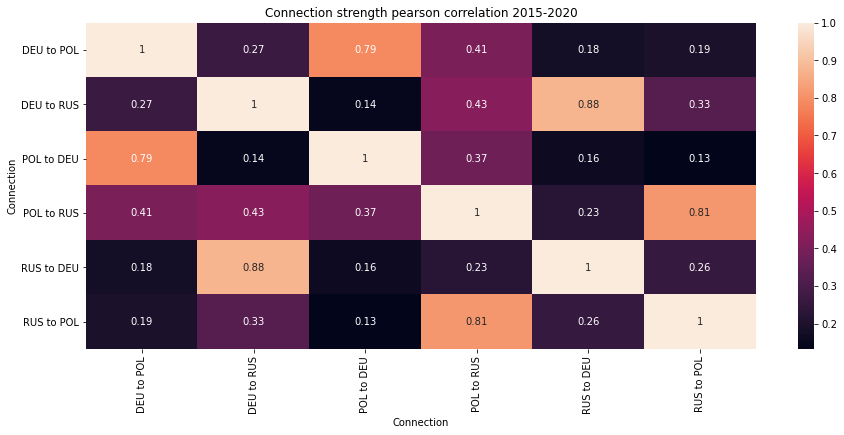

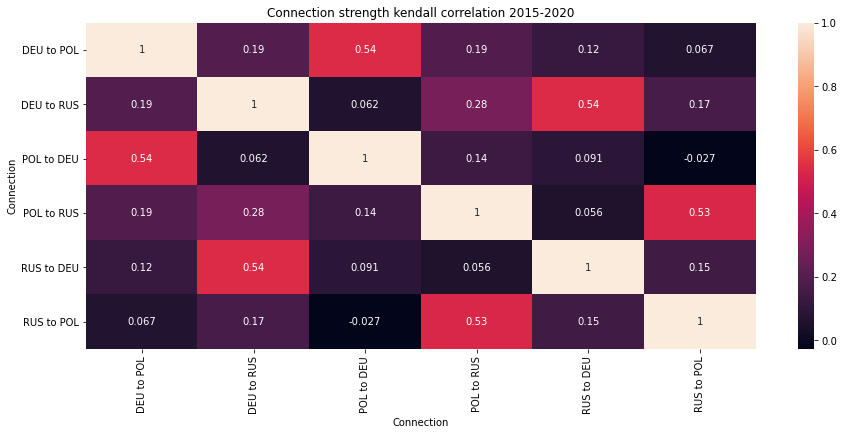

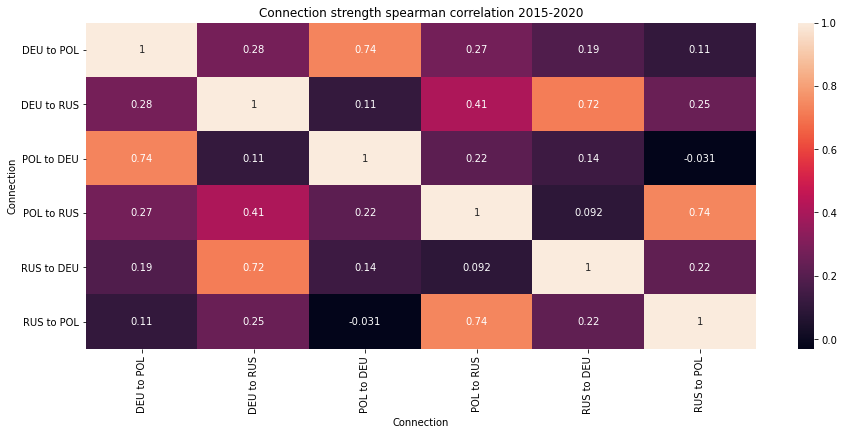

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt
methods = ['pearson', 'kendall', 'spearman']
for method in methods:
    g = sn.heatmap(resun.corr(method=method),annot= True)
    title = f"Connection strength {method} correlation 2015-2020"
    g.set_title(title)
    g.figure.set_size_inches(15, 6)
    plt.savefig(f'figures/correlation/{title}.png', bbox_inches='tight')
    plt.show()


In [8]:
resun.columns

Index(['DEU to POL', 'DEU to RUS', 'POL to DEU', 'POL to RUS', 'RUS to DEU',
       'RUS to POL'],
      dtype='object', name='Connection')

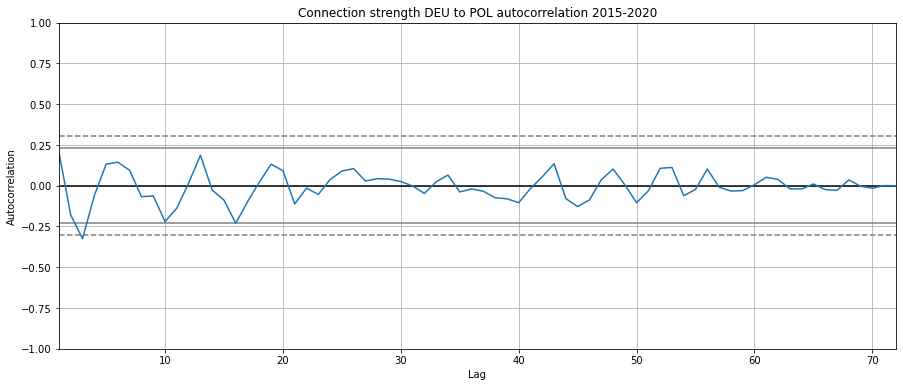

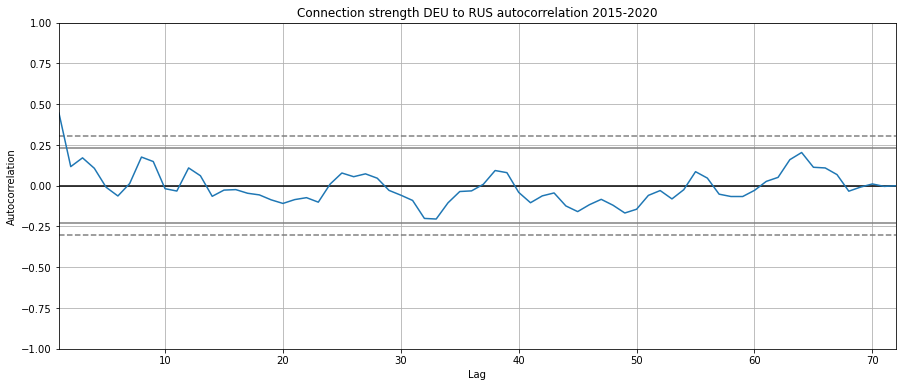

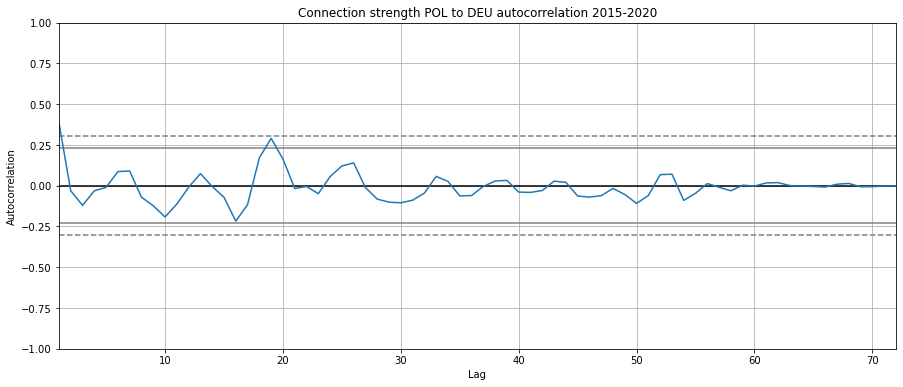

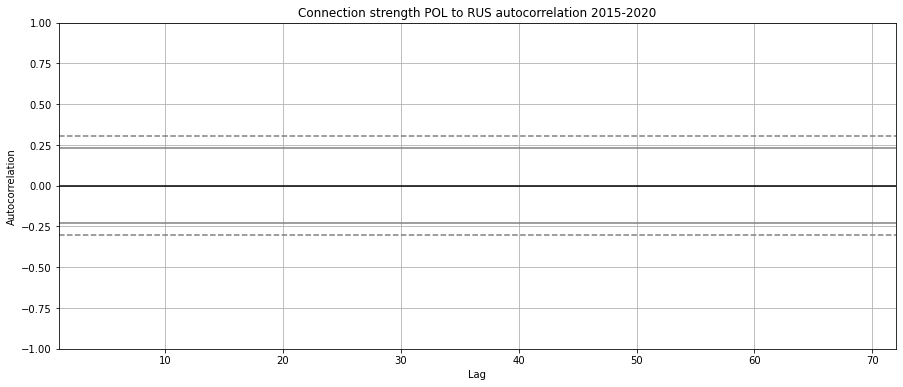

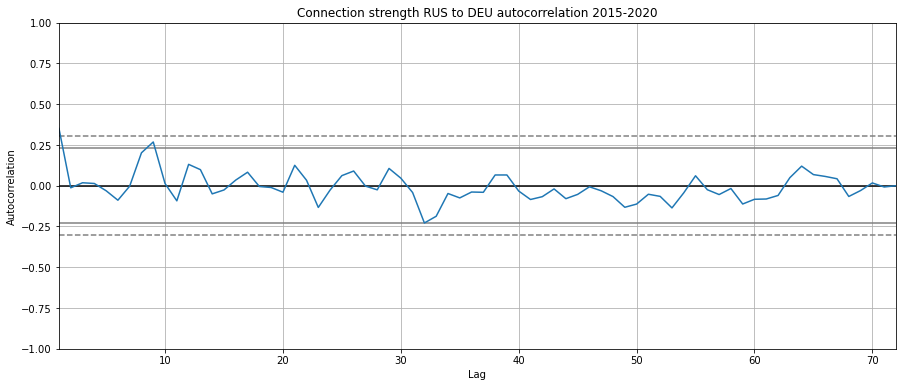

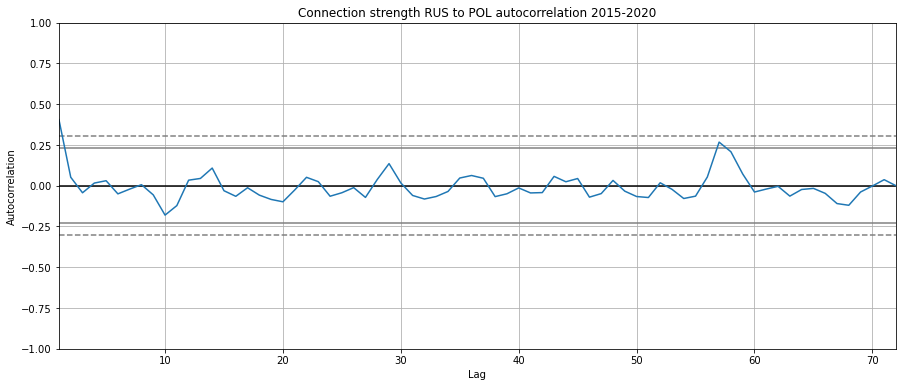

In [9]:
for connection_name in resun.columns:
    g = pd.plotting.autocorrelation_plot(resun[connection_name])
    title = f"Connection strength {connection_name} autocorrelation 2015-2020"
    g.set_title(title)
    g.figure.set_size_inches(15, 6)
    plt.savefig(f'figures/autocorrelation/{title}.png', bbox_inches='tight')
    plt.show()

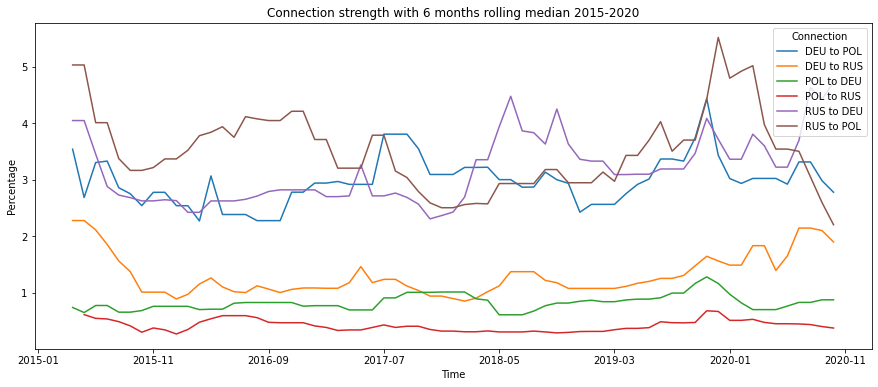

In [10]:
f,ax=plt.subplots(figsize=(7,3))
window_length = 6
g = resun.rolling(window=window_length,center=True).median().plot(ax=ax)
title = f"Connection strength with {window_length} months rolling median 2015-2020"
g.set_title(title)
g.figure.set_size_inches(15, 6)
g.set(ylabel='Percentage')
plt.savefig(f'figures/rolling/{title}.png', bbox_inches='tight')
plt.show()

In [29]:
resun['DEU to POL']

Time
2015-01    4.247104
2015-02    1.936133
2015-03    2.538937
2015-04    4.732625
2015-05    4.296947
             ...   
2020-08    2.347831
2020-09    3.620730
2020-10    1.902089
2020-11    2.174968
2020-12    3.211531
Name: DEU to POL, Length: 72, dtype: float64

{(0, 1), (1, 2), (1, 3), (4, 5), (1, 4), (1, 5), (2, 4), (0, 5), (2, 3), (2, 5), (0, 4), (0, 3), (3, 4), (0, 2), (3, 5)}


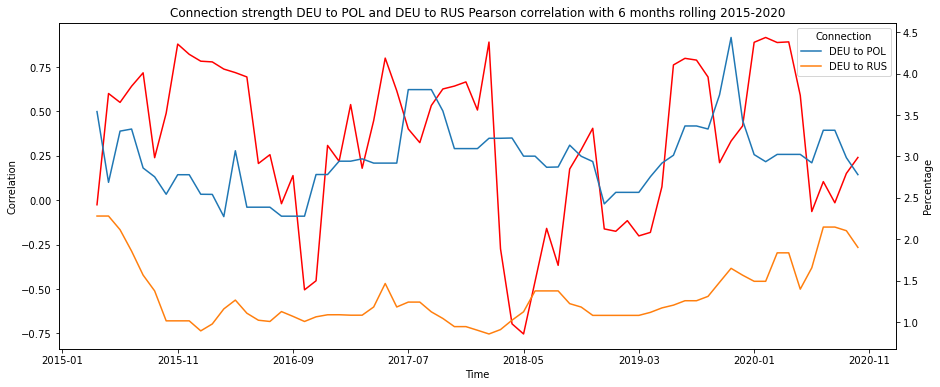

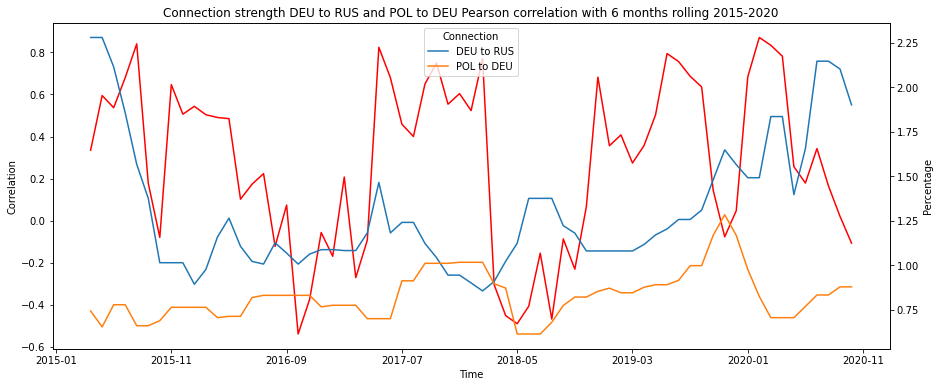

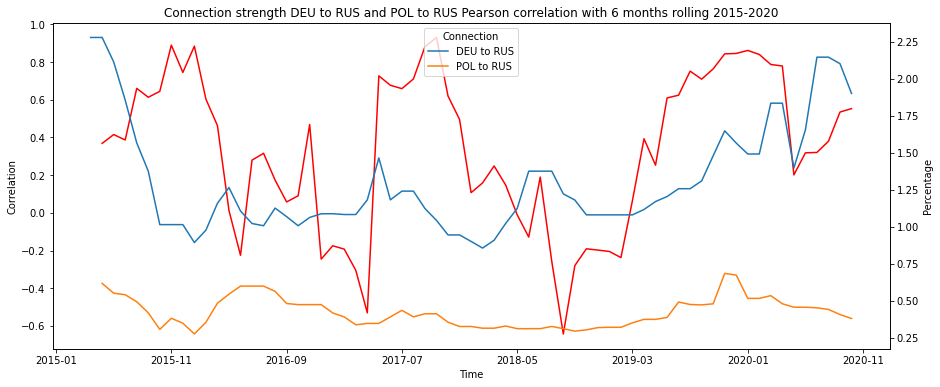

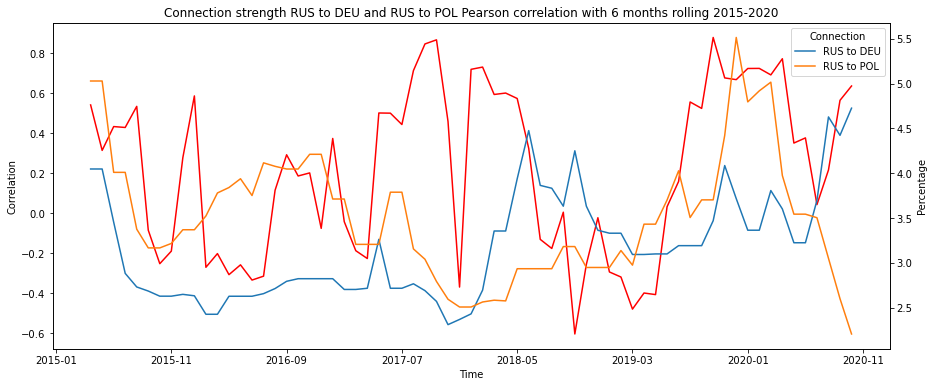

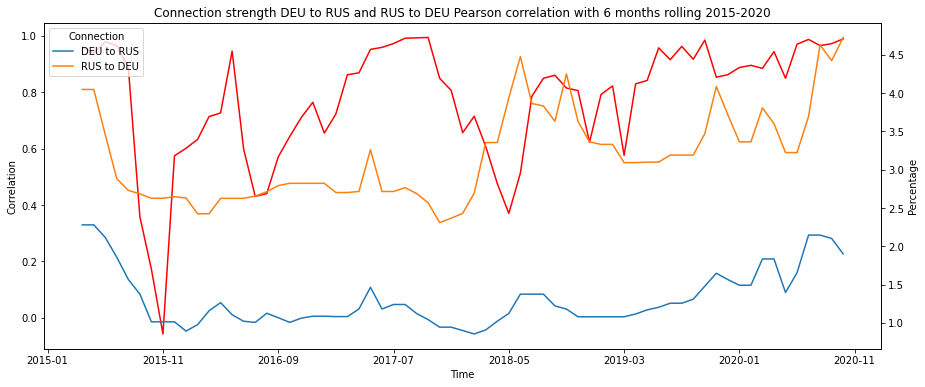

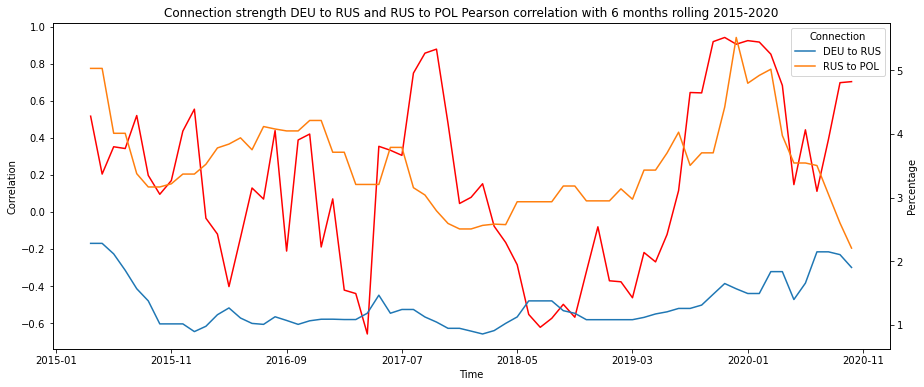

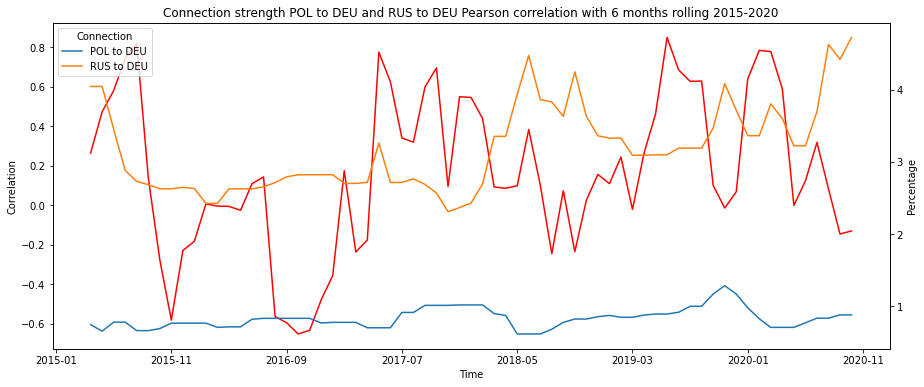

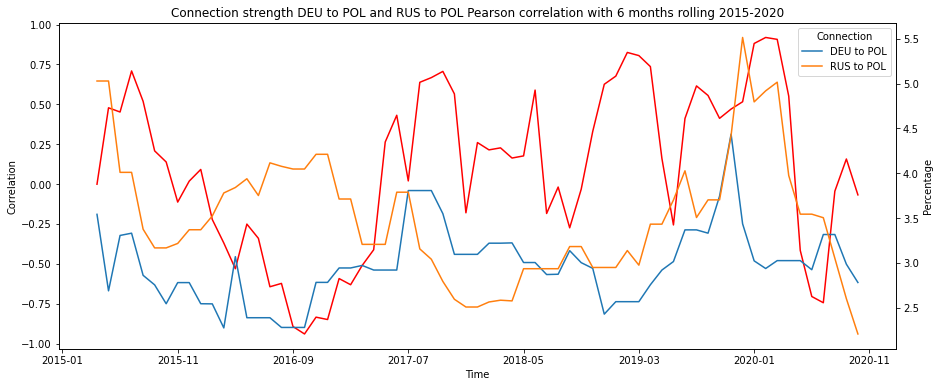

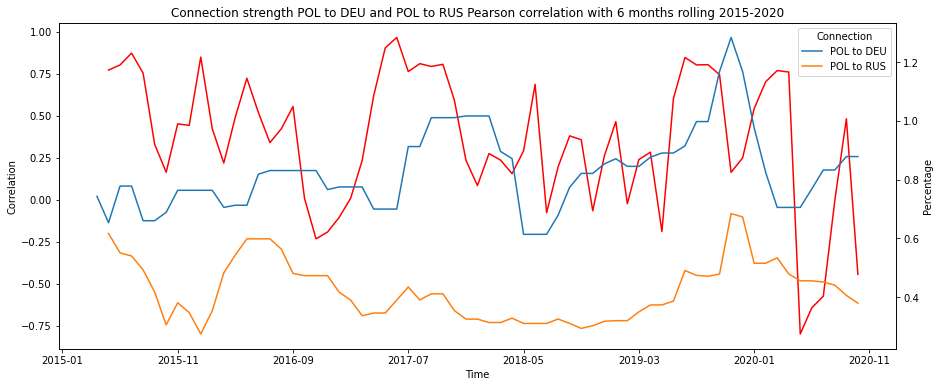

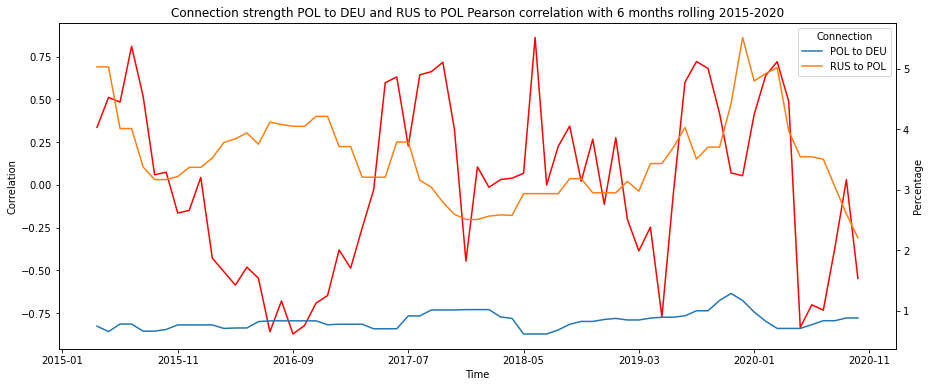

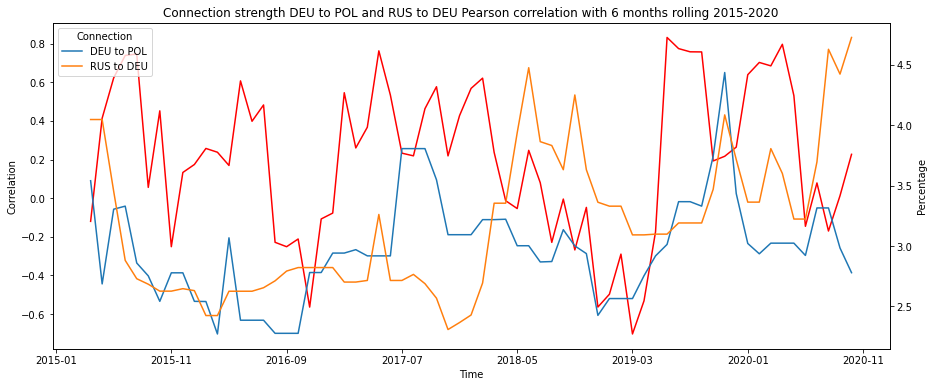

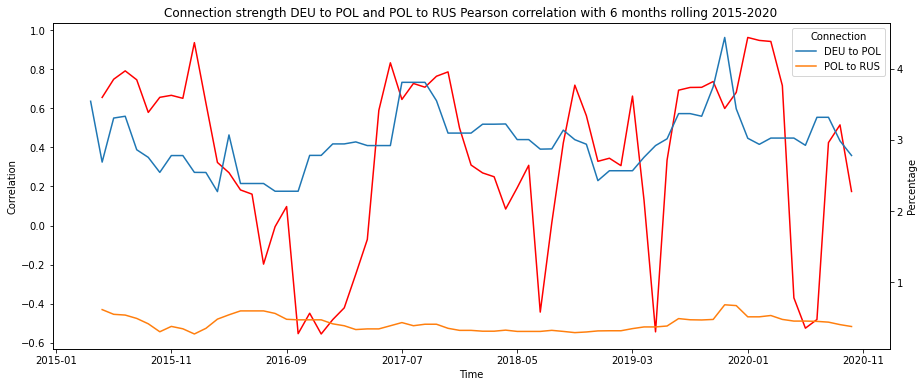

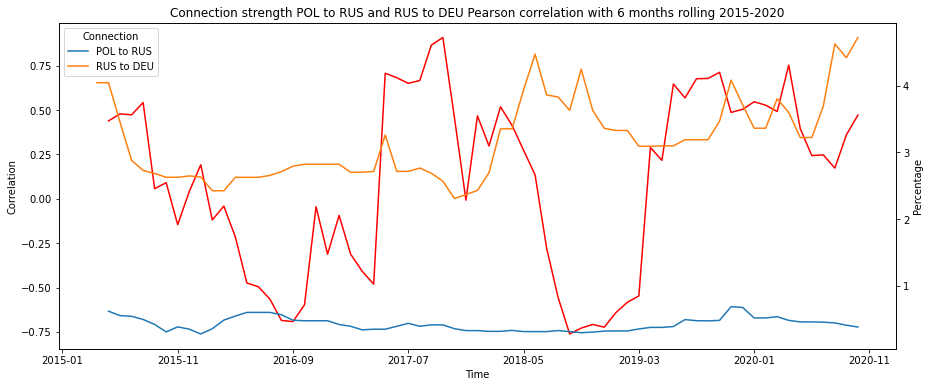

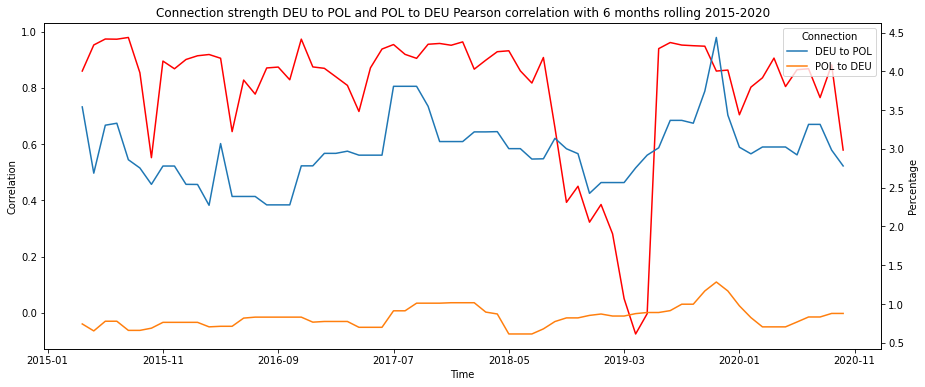

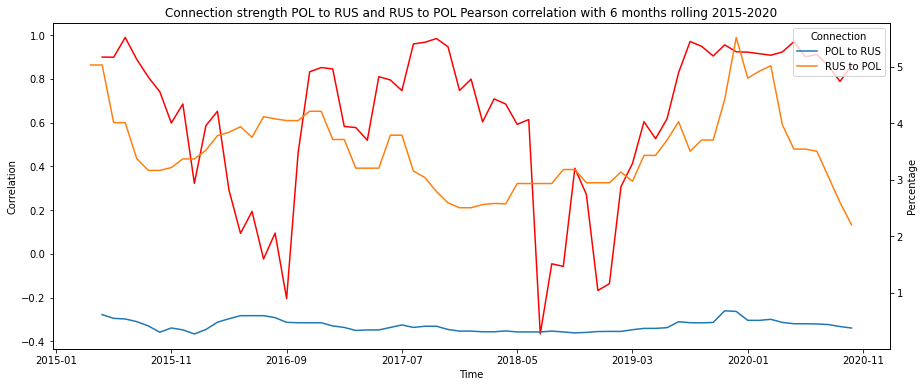

In [59]:
import itertools
# Set window size to compute moving window synchrony.
r_window_size = 6
data_window_size = r_window_size
# Interpolate missing data.
df_interpolated = resun.interpolate()
# Compute rolling window synchrony

length = len(resun.columns)
combi = set(itertools.combinations(range(length), 2))
print(combi)
for i, j in combi:
    connection_A = resun.columns[i]
    connection_B = resun.columns[j]
    rolling_r = df_interpolated[connection_A].rolling(window=r_window_size, center=True)\
        .corr(df_interpolated[connection_B])

    g = rolling_r.plot(style='r-')
    title = f"Connection strength {connection_A} and {connection_B} Pearson correlation with {window_length} months rolling 2015-2020"
    g.set_title(title)
    g.figure.set_size_inches(15, 6)
    g.set(ylabel='Correlation')

    g2 = g.twinx()

    g2 = resun[[connection_A, connection_B]].rolling(window=window_length,center=True).median().plot(ax=g2)

    g2.set(ylabel='Percentage')

    # plt.legend([g.get_lines()[0], g2.get_lines()[0]],
    #            ['Correlation', connection_A, connection_B])

    plt.savefig(f'figures/pairwise_correlation/{title}.png', bbox_inches='tight')
    plt.show()



In [ ]:
import numpy as np
df = resun
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation.
    Shifted data filled with NaNs

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))

In [ ]:
length = len(resun.columns)
combi = set(itertools.combinations(range(length), 2))
print(combi)
for i, j in combi:
    connection_A = resun.columns[i]
    connection_B = resun.columns[j]

    d1 = df[connection_A]
    d2 = df[connection_B]

    months_lag = 10
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(months_lag-1),int(months_lag))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    f,ax=plt.subplots(figsize=(15,6))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    title = f"Connection strength {connection_A} and {connection_B} Pearson cross correlation 2015-2020"
    ax.set(title=f'{title}\n{connection_A} leads <> {connection_B} leads', xlabel='Offset',ylabel='Pearson r')
    ax.set_xticklabels([int(item-months_lag) for item in ax.get_xticks()]);
    plt.legend()
    ax.figure.set_size_inches(15, 6)
    ax.set(ylabel='Percentage')
    plt.savefig(f'figures/cross_correlation/{title}.png', bbox_inches='tight')
    plt.show()

In [ ]:
# Plotly interactive plot
# import plotly.express as px
# pdf = pd.DataFrame({"rs": rs, "offset": range(-int(months_lag-1),int(months_lag))})
# fig = px.line(pdf, x="offset", y="rs", title=f'Offset = {offset} frames\nS1 leads <> S2 leads')
# fig.show()
